In [1]:
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
df = pd.read_csv('./data/sample_scarcity.csv')
df

,ad,scarcity
0,See why everyone is celebrating at Hoblit Dodg...,0
1,Help give people without a home a chance to le...,0
2,I am so proud of what this grassroots team has...,0
3,We have until March 31st to raise money for ou...,1
4,Learn how to use the new staffing law to impro...,0
...,...,...
194,Check out my new campaign video on why I want ...,0
195,The public should be alarmed by the fact that ...,0
196,Our nation's police officers are in desperate ...,1
197,"By any measure, Dr Jordan B Peterson is the mo...",0


In [3]:
# creating prediction model

# creating the filters 
filters =  [    
            'limited time only', 'limited time', 'almost gone', 'only for' , 'limited edition', 
            'before it', 'last chance', 'days left', 'missing out', 'now on sale', 'too late', 'almost run', 'weeks left', 'hours left',
            'hurry', 'do not wait', 'urge' , 'urging',
            'almost done', 'desperate need', 'act now', 'no time', 'in a race against time', 'one of a kind', 
            'waste time', 'ends soon', 'race against time', 'time running', 'urgence', 'immediately', 'limited', 'end soon' , 'expire soon', 'expire', 'expires', 
            'deadline',  'bargain', 'emergency', 'critical', 'hurry', 'last call', 'urgently', 'urgent', 'less than','until'
            ]

def contains_filter(x):
    for filter in filters:
        if filter in x:
            return 1
    return 0

def predict(X): 
    '''
        This function takes in a dataframe and returns the predicted values 
        params:
            X: dataframe
        returns:
            predicted values using the filters 
    '''
    X['prediction'] = X['ad'].apply(contains_filter)
    return X['prediction']


accuracy:   0.744
              precision    recall  f1-score   support

 no scarcity       0.67      0.97      0.79       101
    scarcity       0.94      0.51      0.66        98

    accuracy                           0.74       199
   macro avg       0.81      0.74      0.73       199
weighted avg       0.81      0.74      0.73       199

confusion matrix:
[[98  3]
 [48 50]]



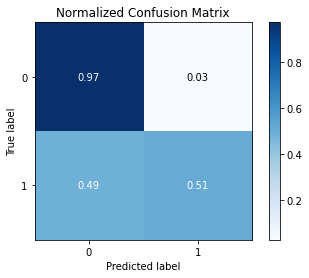

In [4]:
y_pred = predict(df)

# model performance
score = metrics.accuracy_score(df['scarcity'], y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(df['scarcity'], y_pred, target_names=['no scarcity', 'scarcity']))

print("confusion matrix:")
print(metrics.confusion_matrix(df['scarcity'], y_pred))
print()

skplt.metrics.plot_confusion_matrix(df['scarcity'], y_pred, normalize=True)
plt.show()